In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Covid EDA on Indian Covid Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

**India reported 34,703 cases, 553 deaths in last 24 hours. As cases and fatalities dip, the recovery rate has risen to 97.17%. The country's active caseload has declined to 4,64,357.**

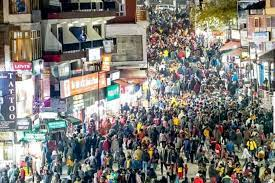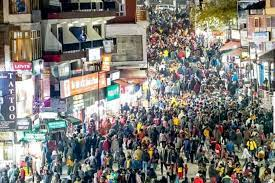

**Don't be like them. Stay Home Stay Safe. Now let's start our EDA**

In [ ]:
data= pd.read_csv("../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

**Some stats gathered from the dataset**

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,cmap='summer')
plt.title("Heatmap of the dataset")

**High correlation between Active and Discharged, Active and Deaths, and Total cases and Active and Deaths**

In [ ]:
sns.distplot(data.Active,color='Blue')
plt.title("Active cases in India",fontsize=15)

In [ ]:
sns.distplot(data.Deaths,color='Red')
plt.title("Death cases in India",fontsize=15)

In [ ]:
sns.distplot(data['Discharged'],color='Yellow')
plt.title("Discharged cases in India",fontsize=15)

**The dataset is a bit right skewed**

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='State/UTs',y='Total Cases',palette='CMRmap',data=data)
plt.title("The total cases as per State/UTs are",fontsize=15)
plt.xticks(rotation=90)

**Maharashtra has the highest number of total cases in India, Kerala and Karnataka rank second and third although there is not much difference between their total counts. **

In [ ]:
plt.figure(figsize=(7,7))
labels = data.index
plt.pie(x='Active',data=data[:5],labels='State/UTs',startangle=90,autopct='%.1f%%')
plt.title("Active Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**32% of the active cases are in Maharshtra alone, 27.1% and 20.5% are in Kerela and Karnataka**

In [ ]:
plt.figure(figsize=(7,7))
labels = data.index
plt.pie(x='Total Cases',data=data[:5],labels='State/UTs',startangle=90,autopct='%.1f%%')
plt.title("Total Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**Maharashtra has the highest count with 37.4% of total cases**

In [ ]:
plt.figure(figsize=(7,7))
labels = data.index
plt.pie(x='Discharged',data=data[:5],labels='State/UTs',startangle=90,autopct='%.1f%%')
plt.title("People Discharged in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**It's good to see the most affected state with Top Discharge Rate**

In [ ]:
plt.figure(figsize=(7,7))
labels = data.index
plt.pie(x='Deaths',data=data[:5],labels='State/UTs',startangle=90,autopct='%.1f%%')
plt.title("Deaths in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**56.6% of the total deaths have happened in Maharashtra followed by 16.3% in Karanataka**

In [ ]:
sns.scatterplot(x='Active Ratio',y='Death Ratio',data=data[:10],palette='Spectral',legend='brief',hue='State/UTs')
plt.title("Top 10 Active Ratio to Deaths Ratio in India",fontsize=15)

**Maharashtra has the highest Active to Death Ratio in the country. Delhi standing at second and Kerela with the lowest ratio**

In [ ]:
sort_data= data.sort_values(by='Active Ratio',ascending=False)
sns.barplot(x='State/UTs',y='Active Ratio',data=data[:10],palette='copper',hue='Death Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Active Ratio to Deaths Ratio in India",fontsize=15)

****

****

In [ ]:
sns.lineplot(y='Active Ratio',data=data[:10],x='State/UTs')
plt.xticks(rotation=90)
plt.title("Line Plot for Active Ratio",fontsize=15)

**Kerela has the highest Active Ratio in the country**

In [ ]:
sns.barplot(x='State/UTs',y='Death Ratio',data=data[:10],hue='Death Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Death Ratio in India",fontsize=15)

**Death ratio in Maharashtra and Delhi are the highest**

In [ ]:
sns.lineplot(y='Death Ratio',data=data[:10],x='State/UTs')
plt.xticks(rotation=90)
plt.title(" Lineplot for Death Ratio",fontsize=15)

In [ ]:
sns.scatterplot(x='Discharge Ratio',y='Active Ratio',data=data[:10],palette='twilight',hue='State/UTs')
plt.title("Discharge Ratio for top 10 states",fontsize=15)

**People in Kerela and Karnataka have been discharged the most from Hospitals**

In [ ]:
sns.barplot(x='State/UTs',y='Death Ratio',data=data[:10],hue='Discharge Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Discharge Ratio in India",fontsize=15)

In [ ]:
sns.lineplot(y='Discharge Ratio',data=data[:10],x='State/UTs')
plt.xticks(rotation=90)
plt.title(" Lineplot for Discharge Ratio",fontsize=15)

**Rajasthan has the highest Discharge Ratio in the country. Good to see people coming back to home from hospitals**

In [ ]:
data['Recovered']=data['Total Cases']-(data['Active']+data['Deaths'])

In [ ]:
data.head()

**Recovered is a custom column for the difference between total cases and sum of active and death cases**

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='State/UTs',y='Recovered',palette='CMRmap',data=data)
plt.title("The Recovered cases as per State/UTs are",fontsize=15)
plt.xticks(rotation=90)

In [ ]:
sns.jointplot(x='Recovered',y='State/UTs',data=data)
plt.xticks(rotation=90)

In [ ]:
sns.barplot(x='State/UTs',y='Recovered',data=data[:10])
plt.xticks(rotation=90)
plt.title("Top 10 most affected States",fontsize=15)

In [ ]:

plt.figure(figsize=(10,5))
sns.pointplot(x='State/UTs',y='Recovered',data=data[:10],color='Red')
plt.xticks(rotation=90)
plt.title("recovered in line Plot",fontsize=15)

In [ ]:
plt.figure(figsize=(7,7))
labels = data.index
plt.pie(x='Recovered',data=data[:10],labels='State/UTs',startangle=90,autopct='%.1f%%')
plt.title("Recovery in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**Summary**

**1. Maharashtra has been affected the most in India. 2. Kerela stands the second followed by Karnataka 3. Rajashthan has the best discharge ratio 4.  Discharge to Active Ratio is highest in Kerela followed by Karnataka. 5. Death ratio is highest in Maharashtra and Chattisgarh. 6. Most Active Ratio is in Kerela and least is in Delhi and Uttar Pradesh 7. Recovery is also highest in Maharashtra, Kerala and Karnataka stands at 2nd and 3rd respectively**

   